**LOAD DATASETS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#load datasets
iris=load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**ANALISIS DATA**

In [ ]:
pds.DataFrame(iris["data"], columns=iris["feature_names"])

**FITUR DAN LABEL IRIS**

In [ ]:
x = iris.data
y = iris.target

**TRAIN TEST SPLIT**

In [ ]:
iris_data=iris.data
iris_data.shape

(150, 4)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 0)

In [ ]:
x_train.shape


(112, 4)

In [ ]:
x_test.shape

(38, 4)

**MENSTANDARKAN DATA**

In [ ]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

**K-Nearest Neighbors**

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=5)

**TRAIN MODEL**

In [ ]:
knnmodel.fit(x_train_std, y_train)

KNeighborsClassifier()

**MEMBUAT PREDIKSI MENGGUNAKAN MODEL**

In [ ]:
y_pred = knnmodel.predict(x_test_std)
print('prediksi yang salah dari total')
print((y_test != y_pred).sum(),'/',((y_test == y_pred).sum()+(y_test != y_pred).sum()))
print('persentase akurasi: ',100*accuracy_score(y_test, y_pred))

prediksi yang salah dari total
2 / 38
persentase akurasi:  94.73684210526315


In [ ]:
accuracy_values=[]
for x in range(1,11):
  knnmodel=KNeighborsClassifier(n_neighbors=x).fit(x_train_std, y_train)
  accuracy=accuracy_score(y_test, knnmodel.predict(x_test_std))
  accuracy_values.append([x,accuracy])
  pass

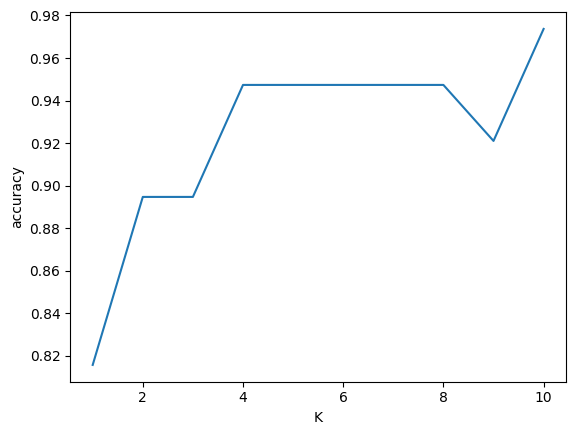

In [ ]:
accuracy_values=np.array(accuracy_values)

plt.plot(accuracy_values[:,0], accuracy_values[:,1])
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()